# Decision Tree (의사결정나무)
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

- [의사결정 나무](https://heytech.tistory.com/145)
  - 불순도 (impurity)가 작은 방향, information gain이 큰 방향으로 분기 (e.g., entropy, gini index, ...)
  - [ID3](https://tyami.github.io/machine%20learning/decision-tree-2-ID3/), [C4.5](https://tyami.github.io/machine%20learning/decision-tree-3-c4_5/), CART 등
- 장점
  - 간단하고 효과적
  - interpretable/직관적 rule
  - 통계적 가정 불필요
- 단점
  - 비연속성: 분리의 경계점 근방에서는 예측 오류가 클 가능성이 있음
  - 선형성 결여: 전체적인 선형 관계 파악이 어려움
  - 비안정성: 데이터 수가 적을 경우 불안정; 과적합에 취약하므로 가지치기 필요

- based on [CART](https://tyami.github.io/machine%20learning/decision-tree-4-CART/)
  - gini index를 기준으로 불순도 평가
  - binary tree 사용
  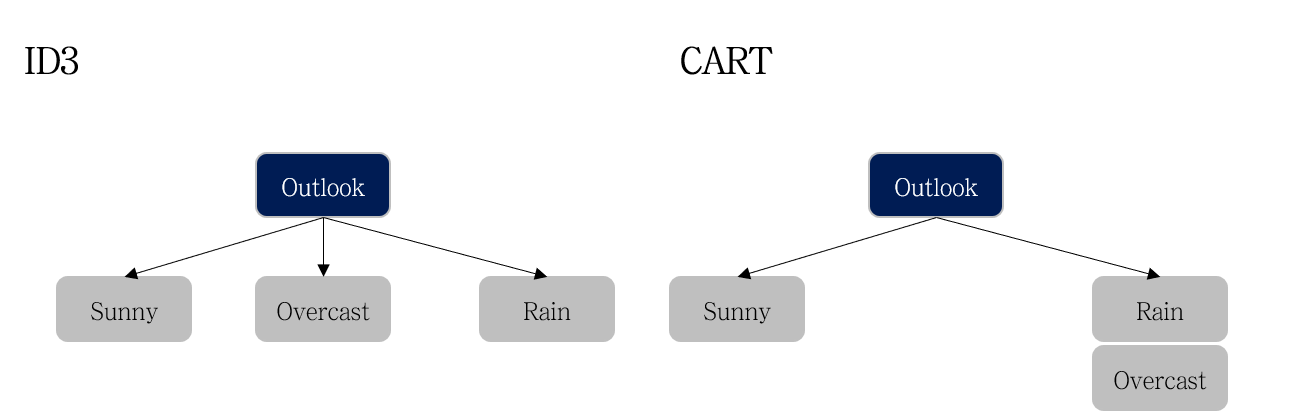

# Y: Categorical

## Step 1. Preprocessing

In [ ]:
# csv파일 불러오기
import pandas as pd
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [ ]:
data # 0: DEAD, 1: Survive

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
data['variety'] = data['variety'].map({'Setosa': int(1),
                             'Versicolor': int(2),
                             'Virginica':int(3),
                             },
                             )
data
# Setosa : 1 
# Versicolor : 2
# Virginica : 3 


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
import pandas as pd
data['variety'].value_counts() # Y열의 데이터 개수 확인
# Setosa : 1 
# Versicolor : 2
# Virginica : 3

1    50
2    50
3    50
Name: variety, dtype: int64

In [ ]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]
t_features

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# # One-hot Encoding (decision tree는 비모수적 방법이므로, dummy변수를 하나 제거하는게 아니다! 살린다.)
# t_features = pd.get_dummies(data = t_features, columns = ['Pclass'], prefix = 'Pclass')

In [ ]:
t_features

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 2021, stratify=t_target)

In [ ]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

120
120
30
30


In [ ]:
import pandas as pd
pd.DataFrame(train_target)['variety'].value_counts() # Y열의 데이터 개수 확인
# Setosa : 1 
# Versicolor : 2
# Virginica : 3 

1    40
3    40
2    40
Name: variety, dtype: int64

- class 불균형이 심한 경우 샘플링 진행

In [ ]:
# class 1,2,3 모두 40개로 갯수가 동일하므로 Under Sampling과정이 필요없음 
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_target, random_state=312)

# import imblearn
# from imblearn.under_sampling import RandomUnderSampler
# train_features_us, train_target_us = RandomUnderSampler(random_state=312).fit_resample(x_shuffled, y_shuffled)

In [ ]:
import pandas as pd
pd.DataFrame(y_shuffled)['variety'].value_counts() # Y열의 데이터 개수 확인: total 546명

1    40
2    40
3    40
Name: variety, dtype: int64

## Step 2. Decision Tree Modeling
- entropy (uncertainty)
  - $E=-\sum^k_{i=1}p_ilog_2(p_i)$

- gini index: 엔트로피와 같은 불순도 (Impurity) 지표
  - 경제적 불평등을 계수화
  - 분류가 잘 될 때 낮은 값
  - CART 알고리즘에서는 모든 조합에 대해 Gini index를 계산한 후, Gini index가 가장 낮은 지표를 찾아 분기
  - $Gini(t,D)=1-\sum_{l \in levels(t)}P(t=l)^2$

- Information gain
  - impurity의 개선 정도
    - decision tree에 의해 나누기 전의 impurity - 나누어진 subset들의 impurity
- pruning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
'''
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
tree = DecisionTreeClassifier(random_state = 312)
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
tree_fit = tree.fit(train_features, train_target)

In [ ]:
tree_fit

DecisionTreeClassifier(random_state=312)

In [ ]:
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import os

In [ ]:
import numpy as np
feature_names = train_features.columns.tolist()
target_name = np.array(['Setosa','Versicolor','Virginica'])
# Setosa : 1 
# Versicolor : 2
# Virginica : 3 

In [ ]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png') #Tree 이미지를 저장

True

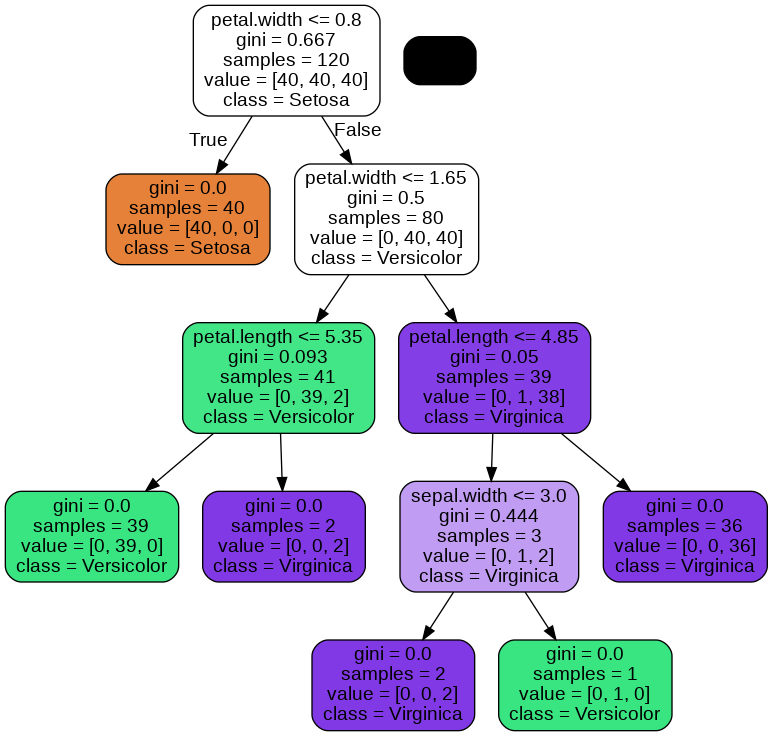

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features,
                       y=train_target,
                       scoring = ['accuracy'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV accuracy: %s' % scores['test_accuracy'])
print('CV aacuracy(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_accuracy']),
                                     np.std(scores['test_accuracy'])))

CV accuracy: [1.         1.         1.         0.91666667 1.         1.
 1.         1.         1.         0.75      ]
CV aacuracy(Mean): 0.967 (std: 0.076)


In [ ]:
y_pred = tree.predict(test_features)

In [ ]:
y_pred

array([1, 2, 3, 3, 1, 2, 1, 2, 3, 1, 2, 2, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3,
       1, 3, 2, 1, 2, 2, 3, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
# Setosa : 1 
# Versicolor : 2
# Virginica : 3 

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['Setosa[1]', 'Versicolor[2]', 'Virginica[3]'],             #정답 데이터
                      columns=['Predict[1]', 'Predict[2]','Predict[3]'])

confmat

,Predict[1],Predict[2],Predict[3]
Setosa[1],10,0,0
Versicolor[2],0,9,1
Virginica[3],0,2,8


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.82      0.90      0.86        10
           3       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred,average='micro'))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred,average='micro'))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred,average='micro'))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred, multi_class = 'ovo',average='mcro'))

정확도 accuracy: 0.900
정밀도 precision: 0.900
재현율 recall: 0.900
F1-score: 0.900


AxisError: ignored

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

ValueError: ignored

## Step 3. Optimization

In [ ]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=312)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [ ]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

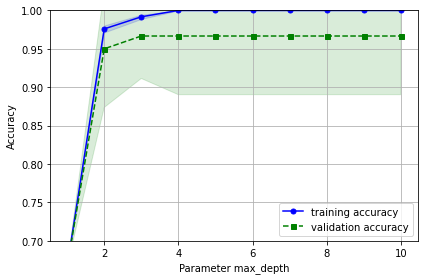

In [ ]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="accuracy",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 오버피팅이 발생하기 전까지인 max_dept = 4 선택

## Step 4. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10, 20, 30, 40, 50]
param_range3 = ['gini', 'entropy']

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'accuracy', #  Classification일때  'accuracy','f1', Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리; -1은 전부를 의미

gs = gs.fit(train_features, train_target)

print(gs.best_score_)
print(gs.best_params_)

0.95
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__min_samples_leaf': 10}


In [ ]:
# 최적의 모델 선택
best_tree = gs.best_estimator_
best_tree.fit(train_features, train_target)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=10,
                                        random_state=312))])

In [ ]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=10, random_state = 2021)

In [ ]:
best_tree_for_graph.fit(train_features, train_target)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=2021)

In [ ]:
y_pred = best_tree.predict(test_features)

In [ ]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['Setosa[1]', 'Versicolor[2]', 'Virginica[3]'],             #정답 데이터
                      columns=['Predict[1]', 'Predict[2]','Predict[3]'])
confmat

,Predict[1],Predict[2],Predict[3]
Setosa[1],10,0,0
Versicolor[2],0,9,1
Virginica[3],0,2,8


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.82      0.90      0.86        10
           3       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('정확도 accuracy: %.3f' % accuracy_score(test_target, y_pred))
print('정밀도 precision: %.3f' % precision_score(y_true= test_target, y_pred=y_pred,average = 'micro'))
print('재현율 recall: %.3f' % recall_score(y_true=test_target, y_pred=y_pred,average = 'micro'))
print('F1-score: %.3f' % f1_score(y_true=test_target, y_pred=y_pred,average = 'micro'))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred,multi_class = 'raise'))

정확도 accuracy: 0.900
정밀도 precision: 0.900
재현율 recall: 0.900
F1-score: 0.900


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

ValueError: ignored

In [ ]:
import numpy as np
feature_names = train_features.columns.tolist()
target_name = np.array(['Setosa[1]', 'Versicolor[2]', 'Virginica[3]'])

In [ ]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best.png') #Tree 이미지를 저장

True

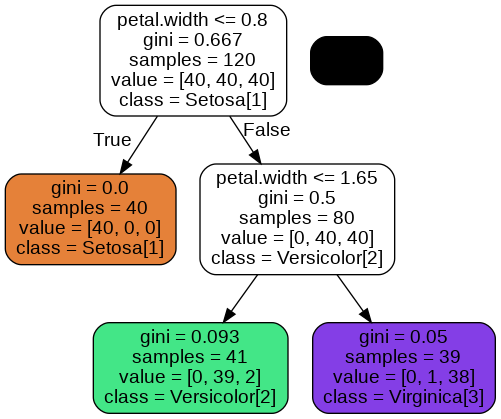

In [ ]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

- [feature_importance](https://soohee410.github.io/iml_tree_importance): 불순도를 가장 크게 감소시키는 변수의 중요도가 가장 큼
  - 연속형 변수 또는 카테고리 개수가 매우 많은 변수들(high cardinality)의 중요도를 더욱 부풀릴 가능성이 높음
  - train 과정에서 얻은 중요도이기 때문에, test 데이터셋에서는 이 변수 중요도가 어떻게 변하는 지 알 수 없음 
  - 어떤 변수가 어떤 방향으로(positive or negative)로 영향일 미치는지 판단을 할 수 없음 -> [shap value](https://todayisbetterthanyesterday.tistory.com/56)

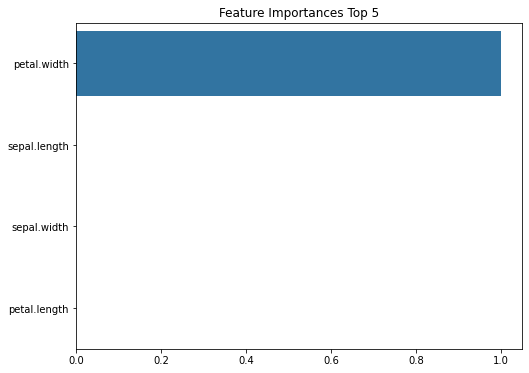

In [ ]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [ ]:
feature_importances.sort_values(ascending=False)

petal.width     1.0
sepal.length    0.0
sepal.width     0.0
petal.length    0.0
dtype: float64